In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torch.utils.data import DataLoader

# Read Data

In [2]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 13353650.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210461.78it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3885359.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10001054.65it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
print(f"Train Data Length : {len(train_data)}")
print("**********************************************")
print(f"Test Data Length : {len(test_data)}")

Train Data Length : 60000
**********************************************
Test Data Length : 10000


In [4]:
image,label=train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
label

9

In [6]:
image.shape

torch.Size([1, 28, 28])

# Class Name

In [7]:
class_name=train_data.classes
print(f"Class Name : {class_name}")

Class Name : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
class_name[label]

'Ankle boot'

# Class with index

In [9]:
class_index=train_data.class_to_idx
print("Class With Index :\n",class_index)

Class With Index :
 {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

# Visualize Data

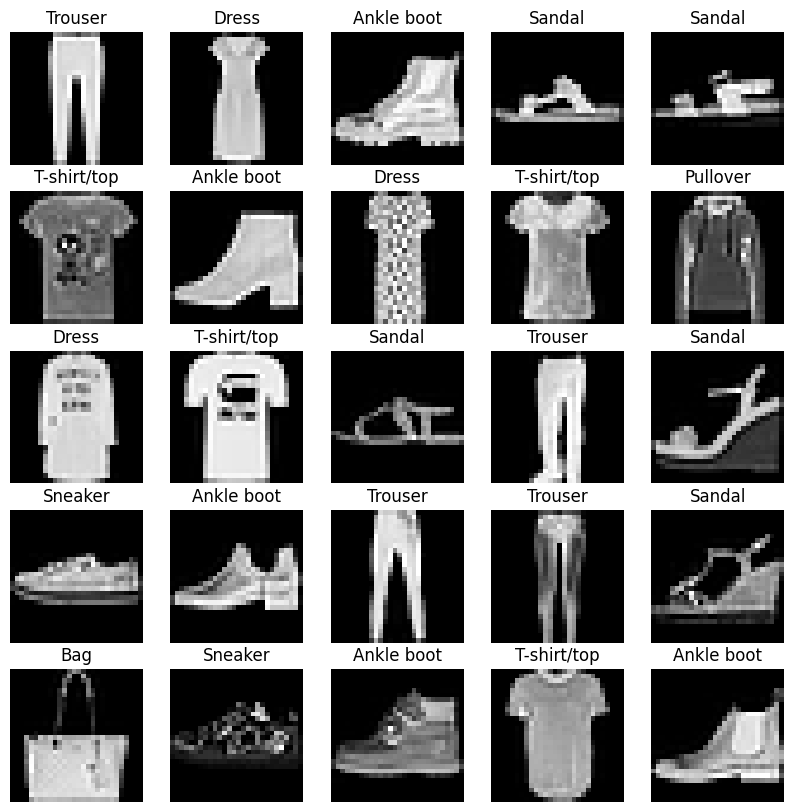

In [13]:
fig=plt.figure(figsize=(10,10))
rows=5
cols=5
for i  in range(1,rows*cols+1):
    random_index=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_index]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[label])
    plt.axis("off")
plt.show()

# Prepare DataLoader

In [14]:
batch_size=32
train_dataloader=DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

In [15]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
print("Train features batch shape :",train_features_batch.shape)
print("Train Labels batch shape :",train_labels_batch.shape)

Train features batch shape : torch.Size([32, 1, 28, 28])
Train Labels batch shape : torch.Size([32])


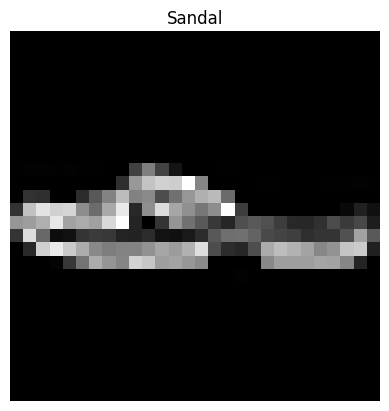



****************************************************
Image Size : torch.Size([1, 28, 28])
Image Label : 5,Label size : torch.Size([])


In [16]:
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis("off")
plt.show()
print("\n")
print("****************************************************")
print(f"Image Size : {img.shape}")
print(f"Image Label : {label},Label size : {label.shape}")

In [17]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Create Model

In [18]:
class FashionModel(nn.Module):
    
    
    
    
    def __init__(self,input_shape,hidden_units,output_shape):
        
        
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)


        )

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )


    def forward(self,x):
        
        x=self.conv_block_1(x)
        # print(x.shape)
        x=self.conv_block_2(x)
        # print(x.shape)
        x=self.classifier(x)
        return x


    
model=FashionModel(1,10,len(class_name))
model

FashionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [19]:
# #  calculate accuracy
# def accuracy_fn(y_true, y_pred):
#     # Move y_true and y_pred to the same device
#     y_true = y_true.to(y_pred.device)

#     correct = torch.eq(y_true, y_pred).sum().item()
#     acc = (correct / len(y_pred)) * 100
#     return acc

In [20]:
def accuracy_fn(y_true, y_pred):
    # Move y_true to the same device as y_pred
    y_true = y_true.to(y_pred.device)
    
    # Calculate accuracy
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    
    # Convert accuracy to a PyTorch tensor
    acc_tensor = torch.tensor(acc, dtype=torch.float32, device=y_pred.device)
    
    return acc_tensor


# optimizer and Loss

In [21]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [22]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn,device:torch.device=device):
    
    train_loss,train_acc=0,0
    model.to(device)
    for batch,(X,y) in enumerate(data_loader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y,y_pred.argmax(dim=1)).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc
    
    
def test_step(data_loader:torch.utils.data.DataLoader,model:torch.nn.Module,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
    
    test_loss=0
    test_acc=0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y=X.to(device),y.to(device)
            test_pred=model(X)
            test_loss+=loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y,test_pred.argmax(dim=1)).to(device)
        test_loss/=len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        return test_loss, test_acc
            
def plot_graphs(train_losses, train_accuracies, test_losses, test_accuracies):
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot([loss.detach().cpu().numpy() for loss in train_losses], label='Train Loss')
    plt.plot([loss.detach().cpu().numpy() for loss in test_losses], label='Test Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot([acc.detach().cpu().numpy() for acc in train_accuracies], label='Train Accuracy')
    plt.plot([acc.detach().cpu().numpy() for acc in test_accuracies], label='Test Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [23]:
# epochs = 3
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_dataloader,
#         model=model,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn
#     )
#     test_step(data_loader=test_dataloader,
#         model=model,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.61964 | Train accuracy: 77.56%
Test loss: 0.38332 | Test accuracy: 86.25%

Epoch: 1
---------
Train loss: 0.34855 | Train accuracy: 87.56%
Test loss: 0.37743 | Test accuracy: 86.00%

Epoch: 2
---------
Train loss: 0.31271 | Train accuracy: 88.73%
Test loss: 0.34595 | Test accuracy: 87.59%

Epoch: 3
---------
Train loss: 0.29417 | Train accuracy: 89.45%
Test loss: 0.30324 | Test accuracy: 88.86%

Epoch: 4
---------
Train loss: 0.28018 | Train accuracy: 89.84%
Test loss: 0.30238 | Test accuracy: 89.13%

Epoch: 5
---------
Train loss: 0.26896 | Train accuracy: 90.27%
Test loss: 0.30931 | Test accuracy: 88.62%

Epoch: 6
---------
Train loss: 0.26014 | Train accuracy: 90.47%
Test loss: 0.29083 | Test accuracy: 89.55%

Epoch: 7
---------
Train loss: 0.25572 | Train accuracy: 90.69%
Test loss: 0.27335 | Test accuracy: 90.19%

Epoch: 8
---------
Train loss: 0.24923 | Train accuracy: 90.81%
Test loss: 0.28411 | Test accuracy: 90.09%

Epoch: 9
---------
Train los

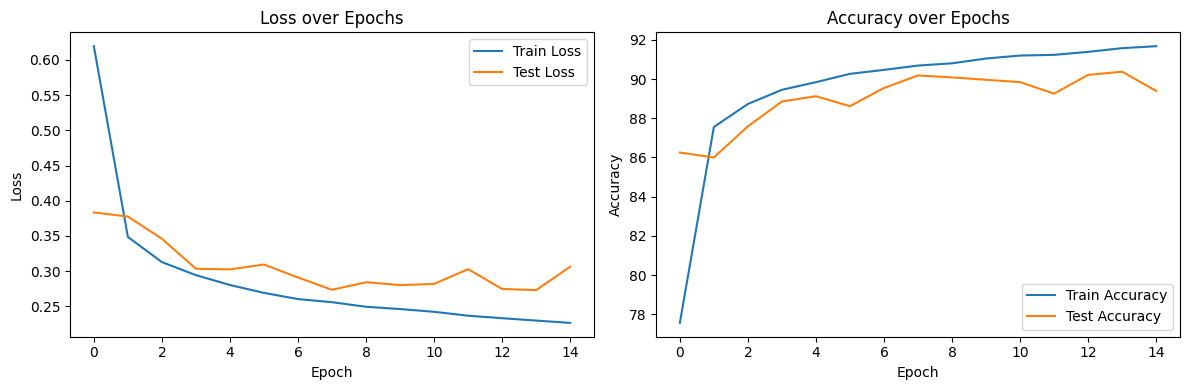

In [24]:
epochs = 15

train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    train_loss, train_acc = train_step(
        model=model,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_loss, test_acc = test_step(
        model=model,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

# Plotting graphs
plot_graphs(train_losses, train_accuracies, test_losses, test_accuracies)

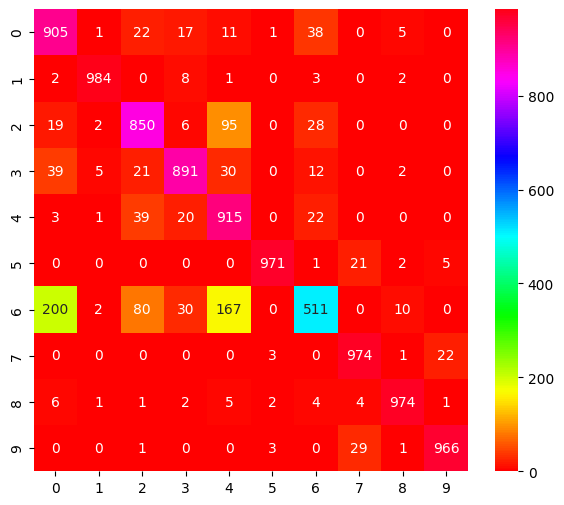

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        test_pred = model(X)
        all_preds.extend(test_pred.argmax(dim=1).cpu().numpy())
        all_labels.extend(y.cpu().numpy())

import seaborn as sns
plt.figure(figsize=(7,6))
cf = confusion_matrix(all_labels, all_preds)
sns.heatmap(cf,annot=True,cmap="hsv",fmt="d")
plt.show()




In [26]:
# Classification Report
class_report = classification_report(all_labels, all_preds)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.85      0.84      1000
           3       0.91      0.89      0.90      1000
           4       0.75      0.92      0.82      1000
           5       0.99      0.97      0.98      1000
           6       0.83      0.51      0.63      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



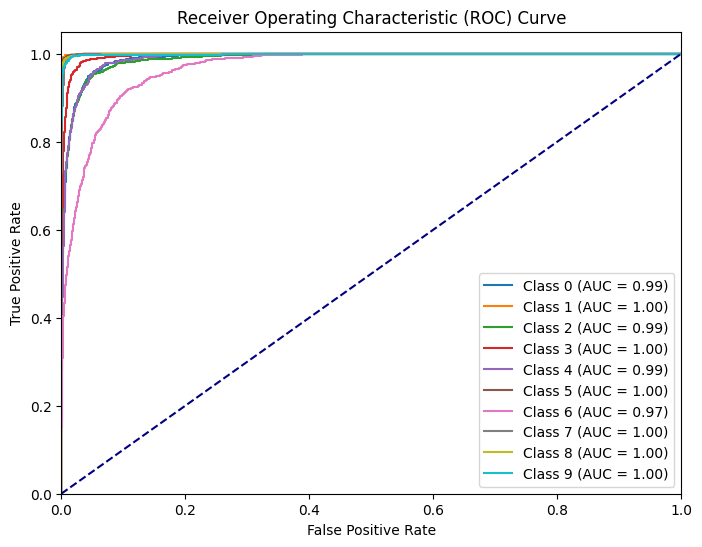

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

class_names = train_data.classes
num_classes = len(class_names)  

all_probs = []
all_labels = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        test_probs = model(X).softmax(dim=1).cpu().numpy()
        all_probs.extend(test_probs)
        all_labels.extend(y.cpu().numpy())


all_probs = np.array(all_probs)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((np.array(all_labels) == i).astype(int), all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
